In [36]:
import rasterio
import geopandas as gpd
import pyproj
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import lightgbm as lgbm
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from numpy import *
import numpy as np

In [37]:
path = 'C:/Users/Rasmu/Documents/Thesis/Hardangervidda/Training_Data/'
#path = 'C://Users/rasmu/Documents/Thesis/Hardangervidda/Dates/20200306/sampled/SD.shp'

In [38]:
df = gpd.read_file(path)

In [39]:
df.head(50)

,SD,VH,Diff,Ratio,Subtract,DEM,geometry
0,1.420,-18.563726,1.514764,2.011621,-9.335482,1231.270020,POINT (134425.640 6706429.847)
1,1.205,-18.501018,1.638188,2.026389,-9.370975,1233.876343,POINT (134405.322 6706333.083)
2,1.315,-19.585024,0.035317,1.876065,-9.145605,1277.901367,POINT (133234.665 6700684.367)
3,1.315,-19.559648,0.043272,1.878584,-9.147735,1282.540894,POINT (133208.058 6700556.576)
4,1.325,-19.426069,0.165241,1.884569,-9.118106,1293.321045,POINT (133191.599 6700478.120)
5,1.565,-19.785042,0.473076,1.924080,-9.502184,1243.953125,POINT (132962.563 6699371.121)
6,1.650,-19.803052,0.558844,1.933875,-9.562961,1241.151855,POINT (132942.080 6699272.898)
7,2.015,-19.737401,0.748876,1.941233,-9.569943,1240.331909,POINT (132921.437 6699174.657)
8,1.770,-19.306099,1.357276,1.977952,-9.545447,1211.713623,POINT (132860.786 6698880.665)
9,1.780,-19.164721,1.495247,1.993046,-9.548924,1204.913940,POINT (132840.788 6698782.256)


(800.0, 1600.0)

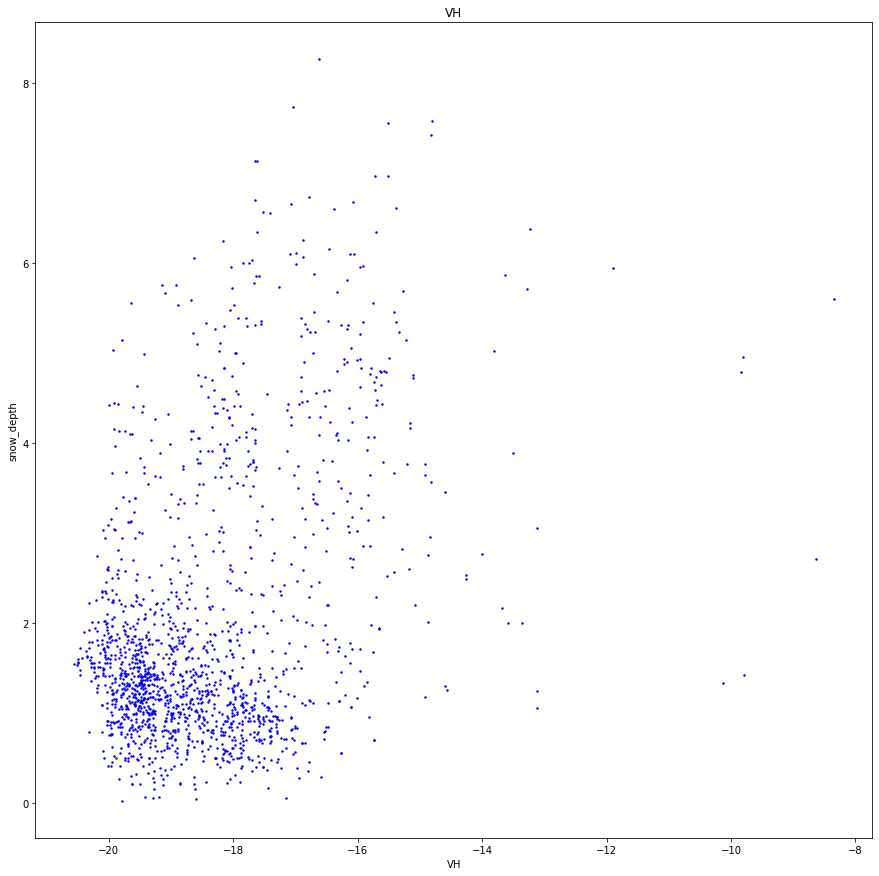

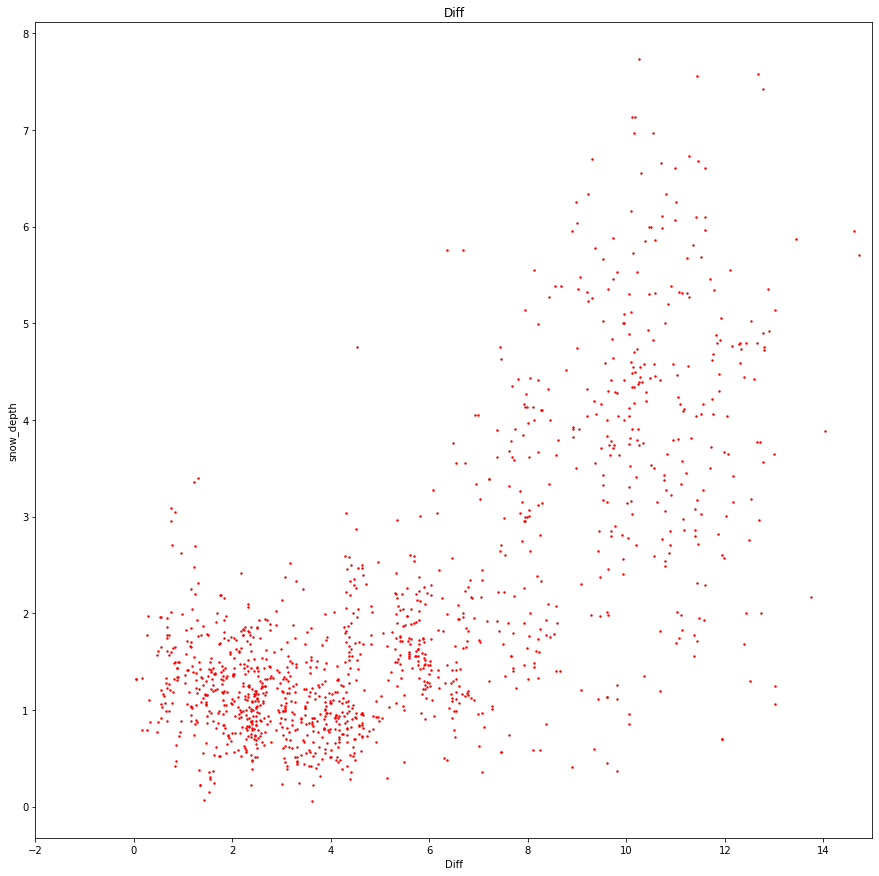

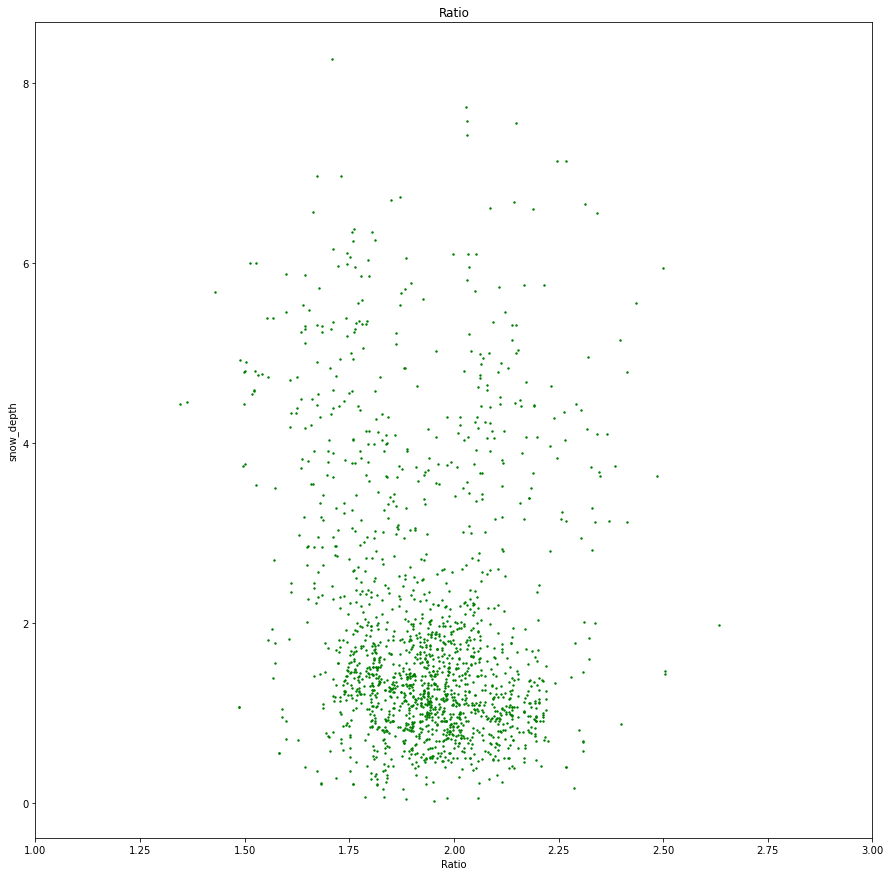

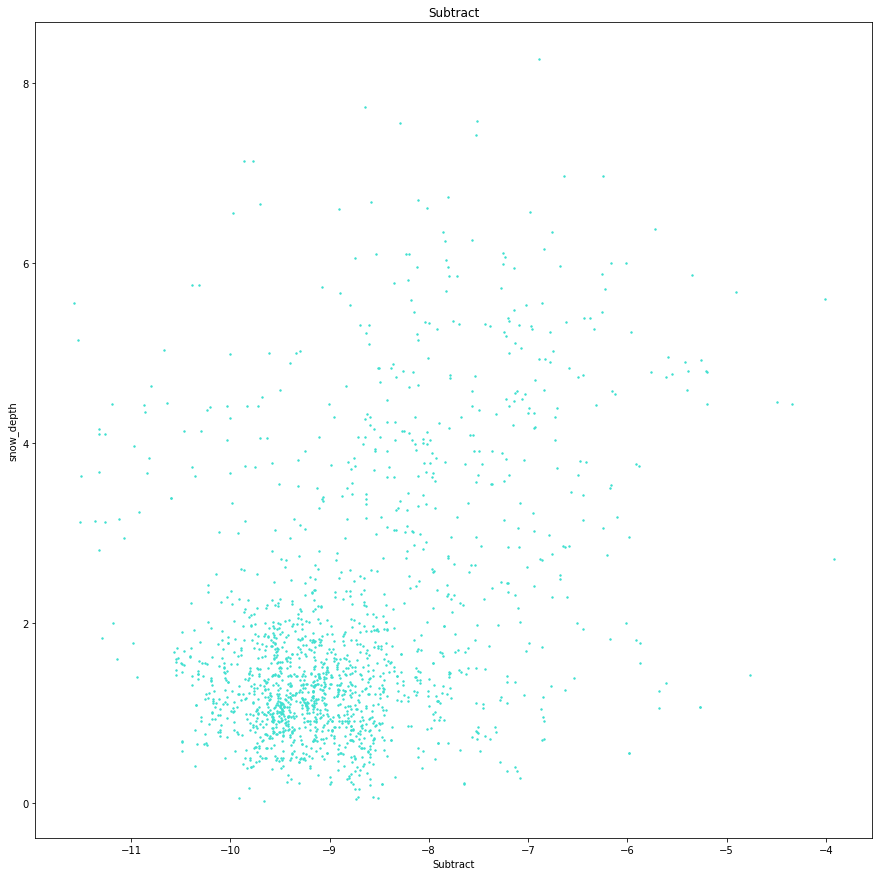

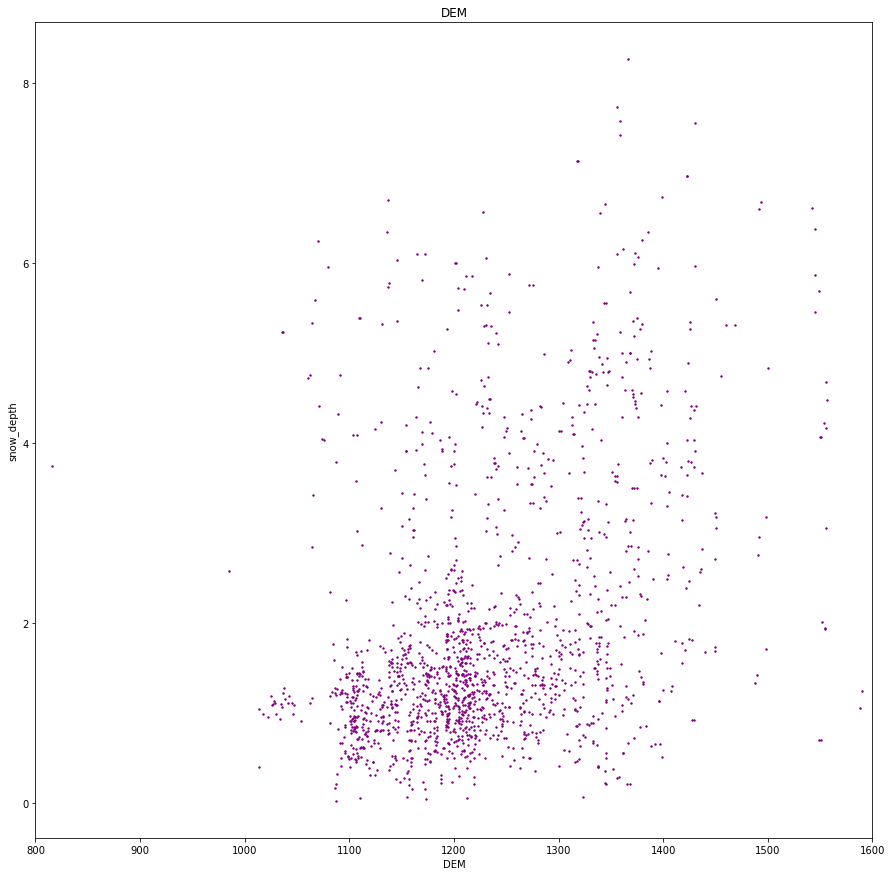

In [40]:
plt.figure(figsize=(15, 15))
plt.title('VH')
plt.xlabel('VH')
plt.ylabel('snow_depth')
#plt.xlim([-1, 5])
plt.scatter(df.VH, df.SD, color='blue',s=2);

plt.figure(figsize=(15, 15))
plt.title('Diff')
plt.xlabel('Diff')
plt.ylabel('snow_depth')
plt.scatter(df.Diff, df.SD, color='red',s=2);
plt.xlim([-2, 15])

plt.figure(figsize=(15, 15))
plt.title('Ratio')
plt.xlabel('Ratio')
plt.ylabel('snow_depth')
plt.scatter(df.Ratio, df.SD, color='green',s=2);
plt.xlim([1, 3])

#plt.figure(figsize=(15, 15))
#plt.title('VH_Diff')
#plt.xlabel('VH_Diff')
#plt.ylabel('snow_depth')
#plt.scatter(df.VH_Diff, df.SD, color='orange');

plt.figure(figsize=(15, 15))
plt.title('Subtract')
plt.xlabel('Subtract')
plt.ylabel('snow_depth')
plt.scatter(df.Subtract, df.SD, color='turquoise',s=2);

plt.figure(figsize=(15, 15))
plt.title('DEM')
plt.xlabel('DEM')
plt.ylabel('snow_depth')
plt.scatter(df.DEM, df.SD, color='purple',s=2);
plt.xlim([800, 1600])

In [41]:
#df = df.replace(np.nan, 0)
#r2 = str(r2_score(df.Subtract, df.SD).round(2))
#print('R2 score is: ', r2)